In [28]:
#!pip install openai

In [22]:
import openai
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


In [11]:
#Make sure you have established a secret key with OpenAI
with open("../2022_12_8_API_Secret.key","r") as fKey:
    openai.api_key = fKey.read().splitlines()[0] #read lines

In [16]:
#Request parameters
caption = "a dog wearing sunglasses and a hat watching TV"
num_of_images_requesting = 2
resolution_requesting = "1024x1024"

In [12]:
#Submitting our Request to the OpenAI ImageGenerator API to generate image(s)
response = openai.Image.create(
  prompt=caption,
  n=num_of_images_requesting, #num of images
  size=resolution_requesting
)

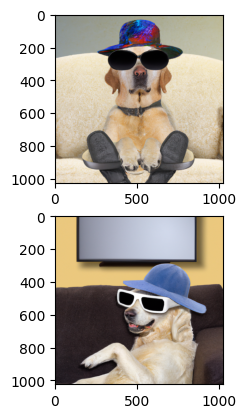

In [27]:
#Parse through the response data payload now
f, ax = plt.subplots(num_of_images_requesting,1)
for i in range(num_of_images_requesting):
    image_url = response['data'][i]['url']
    img_data = requests.get(image_url)
    img = Image.open(BytesIO(img_data.content))
    #plt.title(caption+"-{}".format(i+1))
    img.save('saved/{}-{}.png'.format(caption,i))
    ax[i].imshow(img)
    #break